In [1]:
% setup helper functions
addpath(genpath('../'))

## Definitions

Net magnetization

$$\vec{M} = 
\begin{bmatrix}
M_X \\
M_Y \\
M_Z 
\end{bmatrix}$$

It can vary over space, $\vec{x} = [x,y,z]^T$ and time, $t$:
$$\vec{M}(\vec{x},t) = 
\begin{bmatrix}
M_X(\vec{x},t) \\
M_Y(\vec{x},t) \\
M_Z(\vec{x},t) 
\end{bmatrix}$$

Shorthand for transverse magnetization using complex numbers

$$M_{XY}(\vec{x},t) = M_X(\vec{x},t) + i M_Y(\vec{x},t)$$


Magnetic field

$$\vec{B} = 
\begin{bmatrix}
B_X \\
B_Y \\
B_Z 
\end{bmatrix}$$

It can vary over space, $\vec{x}$ and time, $t$:
$$\vec{B}(\vec{x},t) = 
\begin{bmatrix}
B_X(\vec{x},t) \\
B_Y(\vec{x},t) \\
B_Z(\vec{x},t) 
\end{bmatrix}$$

## Equilibrium Magnetization


At equilibrium the net magnetization, $\vec{M} = [0,0,M_0]^T$ is oriented in the direction of the main magnetic field, $\vec{B} = [0,0,B_0]^T$ (by convention along the z-axis) and has an amplitude of:

$$M_0 = \frac{N \gamma^2 \hbar^2 I_Z (I_Z +1) B_0}{3 k T}$$

$N$ spin density

$\hbar$ Planck's constant

$\gamma$ gyromagnetic ratio

$B_0$ magnetic field

$I_Z$ spin number (1/2 for hydrogen)

k = Boltzmann’s constant (8.62e-5 eV/K or 1.38e-23 J/K)

T = temperature (human body temperature = 310 K) 


### Boltzman distribution

This is the ratio of spins in the spin-up, $N_+$, to the spin-down, $N_-$, states.  This can also be used to derive the equilibrium magnetization above.
$$ \frac{N_+}{N_-} = e^{-\hbar \gamma B_0 / kT}$$ 

## Bloch Equation

The Bloch equation describes the behavior of the net magnetization, $\vec{M}$ in a magnetic field, $\vec{B}$, and can describe the vast majority of all MRI phenomena

$$
\frac{d\vec{M}(t)}{dt} =
\gamma \vec{M}(t) \times \vec{B}(t)
+
\begin{bmatrix}
-1/T_2& 0 & 0 \\
0 & -1/T_2 & 0 \\
0 & 0 & -1/T_1
\end{bmatrix}
\vec{M}(t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0/T_1
\end{bmatrix}
$$

$T_1$ Longitudinal ($M_Z$) or spin-lattice relaxation time constant

$T_2$ Transverse ($M_{XY}$) or spin-spin relaxation time constant

### Precession

The first term in the Bloch equation means that the 
net magnetization, $\vec{M}$ rotates around the magnetic field, $\vec{B}$, with a left-handed rotation.  This rotation is sometimes referred to as precession.

To observe this, we neglect relaxation ($T_1, T_2 \rightarrow \infty$):

$$
\frac{d\vec{M}(t)}{dt} =
\gamma \vec{M}(t) \times \vec{B}(t)
$$


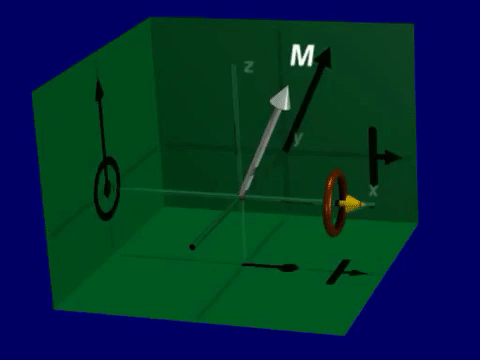

In [2]:
B0 = 1.5e3; % 1.5 T = 1500 mT
% using units of mT and ms for the bloch_rotate function

% start at equilibrium
Mstart = [0,0,1].'; 
% after RF excitation
Mstart = [1,0,0].'; 


Bstatic = [0,0,B0];

% animate rotation?
dt = .1e-6; % .1 ns = .1e-6 ms
N = 300;
t = [1:N]*dt;
Mall = zeros(3,N);
Mall(:,1) = Mstart;
for It = 1:N-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),dt,Bstatic);
end

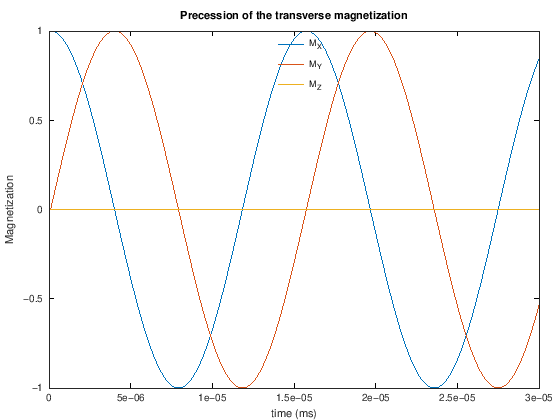

In [3]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Precession of the transverse magnetization'])

### RF Excitation

RF excitation occurs when an oscillating magnetic field is applied orthogonally to the main magnetic field.  If we apply RF at the Larmor frequency, the magnetic field would be
$$\vec{B}(t) = 
\begin{bmatrix}
B_{1,0} \cos(\omega_0 t) \\
-B_{1,0} \sin(\omega_0 t) \\
B_0 
\end{bmatrix}$$

When applied at the Larmor frequency, the applied RF energy and the net magnetization are in resonance, and we achieve excitation.

**RF excitation (rotating at the Larmor frequency)**
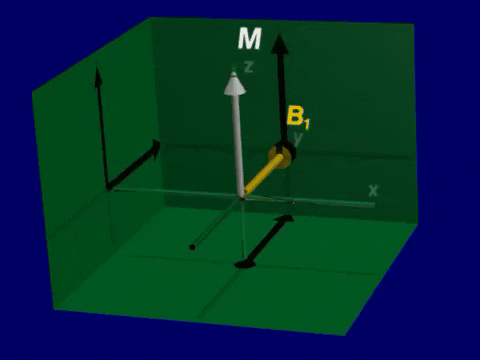

### Lab versus Rotating Frame

For simplification, we use the so-called "rotating frame" - a reference frame that is rotating around the main field (z-axis) at the Larmor frequency, $\omega_0 = \gamma B_0$, which greatly simplifies the interpretation, visualization, and math when analyzing the Bloch equation.  This is in contrast to the "lab frame" or "stationary frame".

In the rotating frame, the magnetic field is 
$$\vec{B}(t) = 


\begin{bmatrix}
B_{1,0} \\
0 \\
0
\end{bmatrix}$$
and RF excitation is a rotation around this simplified representation of the magnetic field.

**RF excitation (viewed in the rotating frame)**
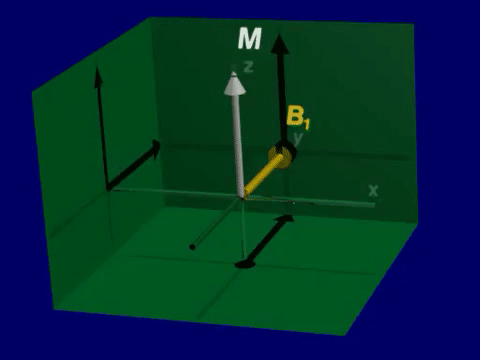



For another illustration of the stationary/lab versus rotating frames, try the "Change Frame" option in this Bloch simulator:

http://drcmr.dk/BlochSimulator/



#### Common flip angle RF excitations
**90-degree flip**
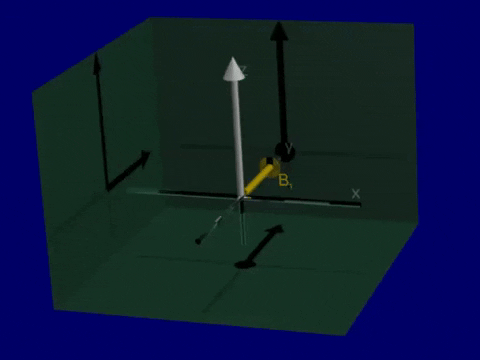

**45-degree flip**
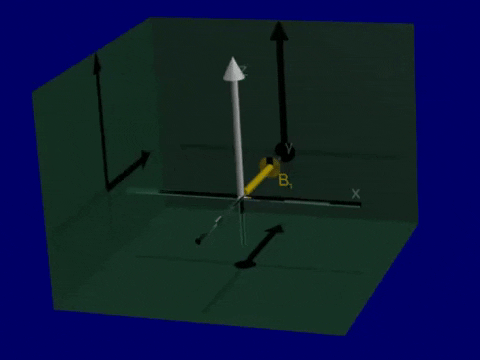

**180-degree flip**
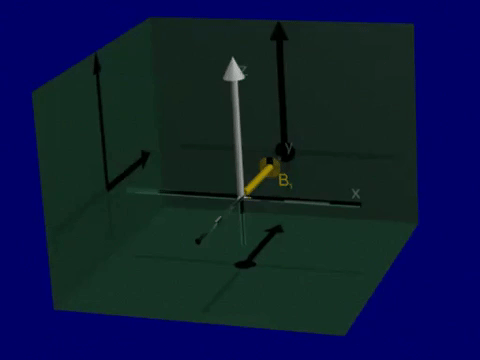

In [13]:
% lab frame

gammabar = 42.58; % kHz/mT

B10 = 10e-3; % 10 uT
B0 = 10; %  10 mT for simplicity to visualize rotation
f0 = gammabar*B0 % kHz

M0 = 1;
M_equilibrium = [0,0,M0].';
t = linspace(0, 1, 1000); % 1 ms


f0 =  425.80


In [14]:
% RF not applied at resonance frequency (constant magnetic field in X)
% lab frame
B = [B10;0;B0];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B);
end

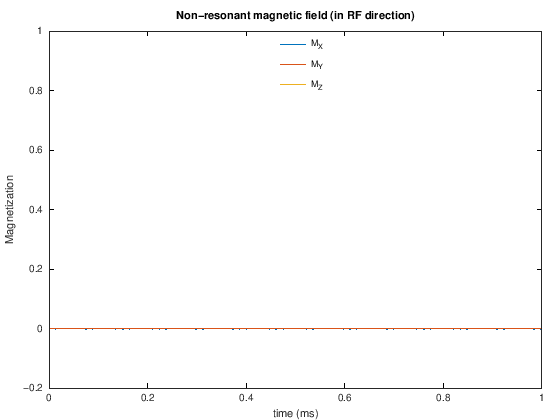

In [15]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Non-resonant magnetic field (in RF direction)'])

The above simulation shows when an additional magnetic field is applied orthogonal to the main magnetic field, but is *not* applied at the Larmor frequency.  There is no creation of transverse magnetization.

Below, this is corrected, and the RF pulse is applied at the Larmor frequency, $\omega_0 = \gamma B_0$:

In [16]:
% RF pulse at Larmor frequency
% lab frame
B = [B10*cos(2*pi*f0*t);B10*-sin(2*pi*f0*t);B0*ones(1,length(t))];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B(:,It));
end

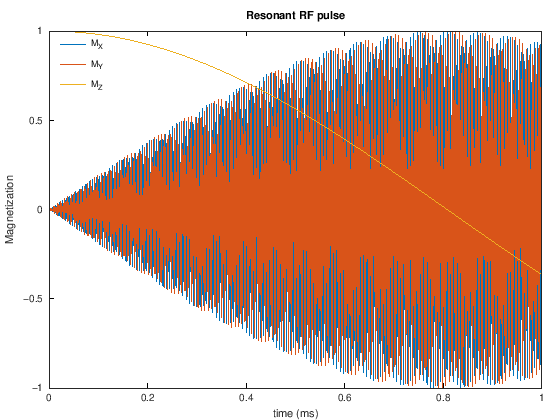

In [17]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'northwest'), legend boxoff
title(['Resonant RF pulse'])

And now with a resonant RF pulse, we have excitation of the net magnetization away from the direction of the main magnetic field, and creation of transverse magnetization, $M_X$ and $M_Y$.

However, it is hard to visualize the transverse magnetization because it is rotating at the Larmor frequency.  To better visualize the transverse magnetization, we use the rotating frame: 

In [18]:
% rotating frame
% RF pulse at Larmor frequency
B = [B10;0;0];  

Mall = zeros(3,length(t));
Mall(:,1) = M_equilibrium;
for It = 1:length(t)-1
    Mall(:,It+1) = bloch_rotate(Mall(:,It),t(It+1) - t(It),B);
end

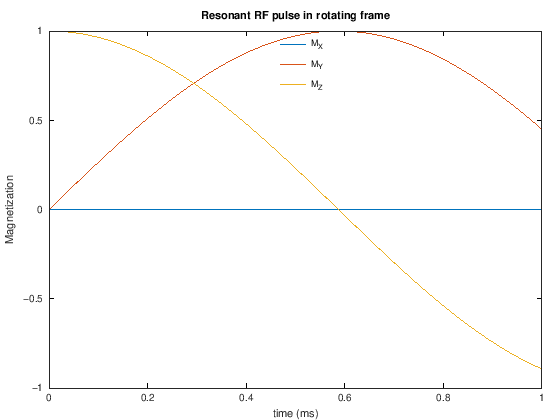

In [19]:
plot(t,Mall)
xlabel('time (ms)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Resonant RF pulse in rotating frame'])

### Relaxation

The net magnetization $\vec{M}$ will return to equilibriuam ($\vec{M} = [0, 0, M_0]^T$ oriented with the main magnetic field along the z-axis) with time constants $T_1$ and $T_2$.

$T_1$ Longitudinal ($M_Z$) or spin-lattice relaxation time constant

$T_2$ Transverse ($M_{XY}$) or spin-spin relaxation time constant

In the rotating frame, without any applied RF energy, the Bloch equation is simplified to

$$
\frac{d\vec{M}(t)}{dt} =
\begin{bmatrix}
-1/T_2& 0 & 0 \\
0 & -1/T_2 & 0 \\
0 & 0 & -1/T_1
\end{bmatrix}
\vec{M}(t)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0/T_1
\end{bmatrix}
$$

This has solutions of

$$
\vec{M}(t) =
\begin{bmatrix}
e^{-t/T_2} & 0 & 0 \\
0 & e^{-t/T_2} & 0 \\
0 & 0 & 1
\end{bmatrix}
\vec{M}(0)
+
\begin{bmatrix}
 0 \\
 0 \\
M_0(1-e^{-t/T_1}
\end{bmatrix}
$$

or

$$M_{XY}(t) = M_{XY}(0) e^{-t/T_2}$$

$$M_Z(t) = M_Z(0) + M_0(1- e^{-t/T_1})$$

In [20]:
t = linspace(0,1); % s

M0=1;
T1 = .8;  T2 = .1; % s
M_equilibrium = [0,0,M0].';

flip= 90;

gammabar = 42.58; % kHz/mT
T = 1; % 1 ms pulse duration
% calculate RF pulse amplitude (milliTesla)
B10 = flip*pi/180 / (2*pi*gammabar*T)

% apply RF tip
M_start = bloch_rftip(M_equilibrium, T, B10)

Mall = zeros(3,length(t));

for It = 1:length(t)
    Mall(:,It) = bloch_relax(M_start,t(It),M0,T1, T2);
end

B10 =  0.0058713
M_start =

  -6.1230e-17
   1.0000e+00
   6.1230e-17



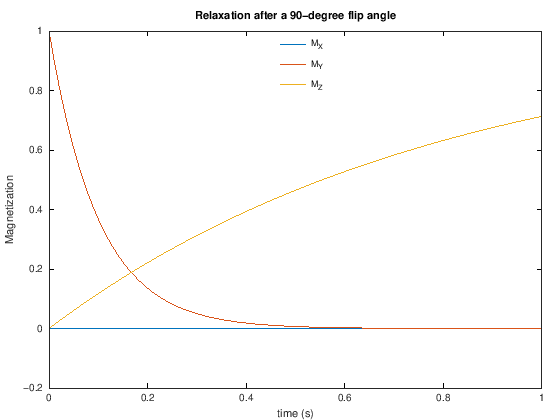

In [21]:
plot(t,Mall)
xlabel('time (s)'), ylabel('Magnetization')
legend({'M_X', 'M_Y', 'M_Z'}, 'location', 'north'), legend boxoff
title(['Relaxation after a ' num2str(flip) '-degree flip angle'])

**T1 and T2 relaxation after RF Excitation**
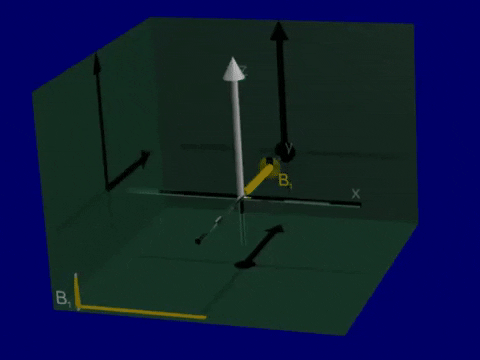